# MVP Análise de Dados e Boas Práticas

**Nome:** Leonardo Valério Rodrigues Pires

**Matrícula:** 4052025000144

**Dataset:** [Brazil Weather Information by INMET](https://drive.google.com/file/d/1dFSmuCUDFtJNNVQqbNrFtn-L3cDAt9Zj/view?usp=sharing)

**COLAB:** [link para o notebook colab](https://colab.research.google.com/drive/1xdKiMZHNp_AQIdhMGB23o6RiM_lIhKBm?usp=sharing)

 Os dados foram originalmente obtidos do repositório público “Brazil Weather Information by INMET”, disponível no Kaggle. Para facilitar a análise e focar no escopo desejado, realizamos o download completo dos dados e disponibilizamos uma versão consolidada no Google Drive, contendo apenas os registros relevantes para este estudo.

# Descrição do Problema

Abril de 2024 apresentou baixa precipitação no Rio de Janeiro?

Esta análise tem como objetivo investigar o comportamento da precipitação mensal na cidade do Rio de Janeiro ao longo da série histórica disponível, utilizando dados meteorológicos públicos fornecidos pelo Instituto Nacional de Meteorologia (INMET).

Ao longo da análise, vamos:

Explorar os dados de precipitação por mês e por ano;

Construir gráficos para visualizar a variação dos acumulados mensais;

Identificar padrões sazonais e possíveis anomalias.

## Hipóteses do Problema

As hipóteses que tracei são as seguintes:

- O mês de Março é considerado o mês do período chuvoso que tem maior precipitação?

- O período chuvoso acontece entre Novembro, Dezembro, Janeiro, Fevereiro, Março e Abril?

- Na série histórica o mês de Abril de 2024 foi o mês mais seco?

## Tipo de Problema

Utilizei uma abordagem de análise exploratória orientada por hipótese, buscando compreender a dinâmica da precipitação mensal no Rio de Janeiro, com especial atenção ao comportamento observado em abril de 2024.

## Seleção de Dados

Os dados foram originalmente obtidos do repositório público “Brazil Weather Information by INMET”, disponível no Kaggle. Para facilitar a análise e focar no escopo desejado, realizei o download completo dos dados e disponibilizei uma versão consolidada no Google Drive.

# Dicionário dos Dados
ESTACAO (object): Código da estação meteorológica (ex: A602). Identifica o ponto de coleta dos dados.

DATA (YYYY-MM-DD): Data da Leitura na Estacao

rain_max (float64): Precipitação total diária em milímetros (mm).

rad_max (float64): Radiação solar máxima registrada no dia, geralmente em watts por metro quadrado (W/m²).

temp_avg (float64): Temperatura média diária em graus Celsius (°C).

temp_max (float64): Temperatura máxima registrada no dia (°C).

temp_min (float64): Temperatura mínima registrada no dia (°C).

hum_max (float64): Umidade relativa do ar máxima registrada no dia (%).

hum_min (float64): Umidade relativa do ar mínima registrada no dia (%).

wind_max (float64): Velocidade máxima do vento no dia (km/h ou m/s, dependendo da estação).

wind_avg (float64): Velocidade média do vento no dia.

# Importação das Bibliotecas Necessárias e Carga de Dados

Esta seção consolida todas as importações de bibliotecas necessárias para a análise, visualização e pré-processamento dos dados, bem como o carregamento inicial do dataset Brazil Weather Information by INMET.

***Dataset Principal: Leitura e carga***

In [385]:
# Instala o gdown se necessário
!pip install -q gdown

# Baixa o CSV direto do Google Drive
import gdown
gdown.download(id="1dFSmuCUDFtJNNVQqbNrFtn-L3cDAt9Zj", output="weather.csv", quiet=False)

# Lê o CSV trazendo apenas colunas específicas
import pandas as pd
df = pd.read_csv("weather.csv")

# Visualizar os dados
df.head()
print(df.columns)
print(df.info)

Downloading...
From (original): https://drive.google.com/uc?id=1dFSmuCUDFtJNNVQqbNrFtn-L3cDAt9Zj
From (redirected): https://drive.google.com/uc?id=1dFSmuCUDFtJNNVQqbNrFtn-L3cDAt9Zj&confirm=t&uuid=7eba72cf-1d63-43a9-b1b8-a3972dffd2f2
To: /content/weather.csv
100%|██████████| 252M/252M [00:02<00:00, 108MB/s]


Index(['ESTACAO', 'DATA (YYYY-MM-DD)', 'rain_max', 'rad_max', 'temp_avg',
       'temp_max', 'temp_min', 'hum_max', 'hum_min', 'wind_max', 'wind_avg'],
      dtype='object')
<bound method DataFrame.info of         ESTACAO DATA (YYYY-MM-DD)  rain_max  rad_max   temp_avg  temp_max  \
0          A001        2000-05-07       0.0   2915.0  25.125000      28.3   
1          A001        2000-05-08       0.0   3126.0  22.104167      28.2   
2          A001        2000-05-09       0.0   2901.0  22.041667      28.7   
3          A001        2000-05-10       0.0   2972.0  22.462500      28.9   
4          A001        2000-05-11       0.0   2958.0  21.329167      27.3   
...         ...               ...       ...      ...        ...       ...   
3047574    A898        2025-05-27       0.0   2229.4  19.154167      24.7   
3047575    A898        2025-05-28      12.0    668.6  13.558333      20.0   
3047576    A898        2025-05-29       0.8    748.8   4.300000       7.0   
3047577    A898        2

In [386]:
print(df.columns)

Index(['ESTACAO', 'DATA (YYYY-MM-DD)', 'rain_max', 'rad_max', 'temp_avg',
       'temp_max', 'temp_min', 'hum_max', 'hum_min', 'wind_max', 'wind_avg'],
      dtype='object')


***Pandar-Profiling para Analisar estrutura e qualidade dos Dados***

In [387]:
# Instale apenas uma vez e depois comente esta linha:
#!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

**Carregar um html com informações dos Dados, conforme apresentdo em aula**

In [388]:
# import numpy as np
# import pandas as pd
# from ydata_profiling import ProfileReport  # nova lib (antigo pandas_profiling)

# Geração do relatório
# profile = ProfileReport(
#     df,
#     title='Relatório de Análise Exploratória. Aqui está um aprendizado em aula muito interessante que consolida informações importantes dos dados.',
#     html={'style': {'full_width': True}},
#     variables={
#         "descriptions": {
#             "numerical": "Variáveis Numéricas",
#             "categorical": "Variáveis Categóricas",
#             "boolean": "Variáveis Booleanas",
#             "date": "Variáveis de Data",
#             "url": "Variáveis de URL"
#         }
#     },
#     explorative=True
# )

# Exibe no notebook
# profile.to_notebook_iframe()

# Exporta para HTML
# profile.to_file("relatorio_analise_exploratoria.html")


Foram carregadas todas as estações meteorológicas disponíveis no Brasil. No entanto, para este MVP optamos por trabalhar exclusivamente com as estações localizadas na Cidade do Rio de Janeiro, onde concentramos as análises de temperatura, precipitação e umidade.
Período dos Dados: 2007 a 2025

In [389]:
# Instalar gdown se necessário
!pip install -q gdown

# Baixar o arquivo do Google Drive pelo ID
import gdown

# Link: https://drive.google.com/file/d/1C_O-3zsNCNshkLLLimOhAr02SEO3Chzs/view?usp=sharing
# ID do arquivo: 1C_O-3zsNCNshkLLLimOhAr02SEO3Chzs
gdown.download(id="1C_O-3zsNCNshkLLLimOhAr02SEO3Chzs", output="estacoes.csv", quiet=False)

# Leitura
import pandas as pd

estacoes = pd.read_csv("estacoes.csv", sep=',', encoding='latin1')
estacoes.head()
# Filtrar por UF = RJ
estacoes_rj = estacoes[estacoes['state'] == 'RJ']

# Exibir
print(f"Total de estações no estado do RJ: {len(estacoes_rj)}")
estacoes_rj[['state', 'city_station', 'id_station']]

Downloading...
From: https://drive.google.com/uc?id=1C_O-3zsNCNshkLLLimOhAr02SEO3Chzs
To: /content/estacoes.csv
100%|██████████| 47.8k/47.8k [00:00<00:00, 52.0MB/s]

Total de estações no estado do RJ: 27


,state,city_station,id_station
3,RJ,ECOLOGIA AGRICOLA,A601
28,RJ,MARAMBAIA,A602
29,RJ,XEREM,A603
30,RJ,CAMBUCI,A604
113,RJ,ARRAIAL DO CABO,A606
114,RJ,CAMPOS,A607
115,RJ,MACAE,A608
116,RJ,RESENDE,A609
117,RJ,PICO DO COUTO,A610
118,RJ,VALENCA,A611


In [390]:
# Lista de estações dentro da Cidade do Rio de Janeiro
estacoes_rj = ['A621', 'A652', 'A636']  # Vila Militar, Copacabana, Jacarepaguá

# Filtrar apenas essas estações
df_rio = df[df['ESTACAO'].isin(estacoes_rj)]

# Converter rain_max para tipo numérico (se ainda não for) e tratar erros
df_rio['rain_max'] = pd.to_numeric(df_rio['rain_max'], errors='coerce')

# Manter apenas valores válidos (rain_max ≥ 0) e remover NaN
df_rio = df_rio[df_rio['rain_max'] >= 0]

# Arredondar para 1 casa decimal (opcional, ajuste conforme desejar)
df_rio['rain_max'] = df_rio['rain_max'].round(1)

# Mostrar estações disponíveis (após filtro)
print(df_rio['ESTACAO'].unique())


print(df_rio.columns)


['A621' 'A652' 'A636']
Index(['ESTACAO', 'DATA (YYYY-MM-DD)', 'rain_max', 'rad_max', 'temp_avg',
       'temp_max', 'temp_min', 'hum_max', 'hum_min', 'wind_max', 'wind_avg'],
      dtype='object')


# Análise de Dados

Nesta etapa de Análise de Dados Exploratória (EDA) sobre o dataset Brazil Weather Information by INMET, visamos entender a distribuição, as relações e as características das variáveis, o que é crucial para as etapas subsequentes de pré-processamento e modelagem.

Análise para identificar a sazonalidade das precipitações. Com a demostração do período chuvoso

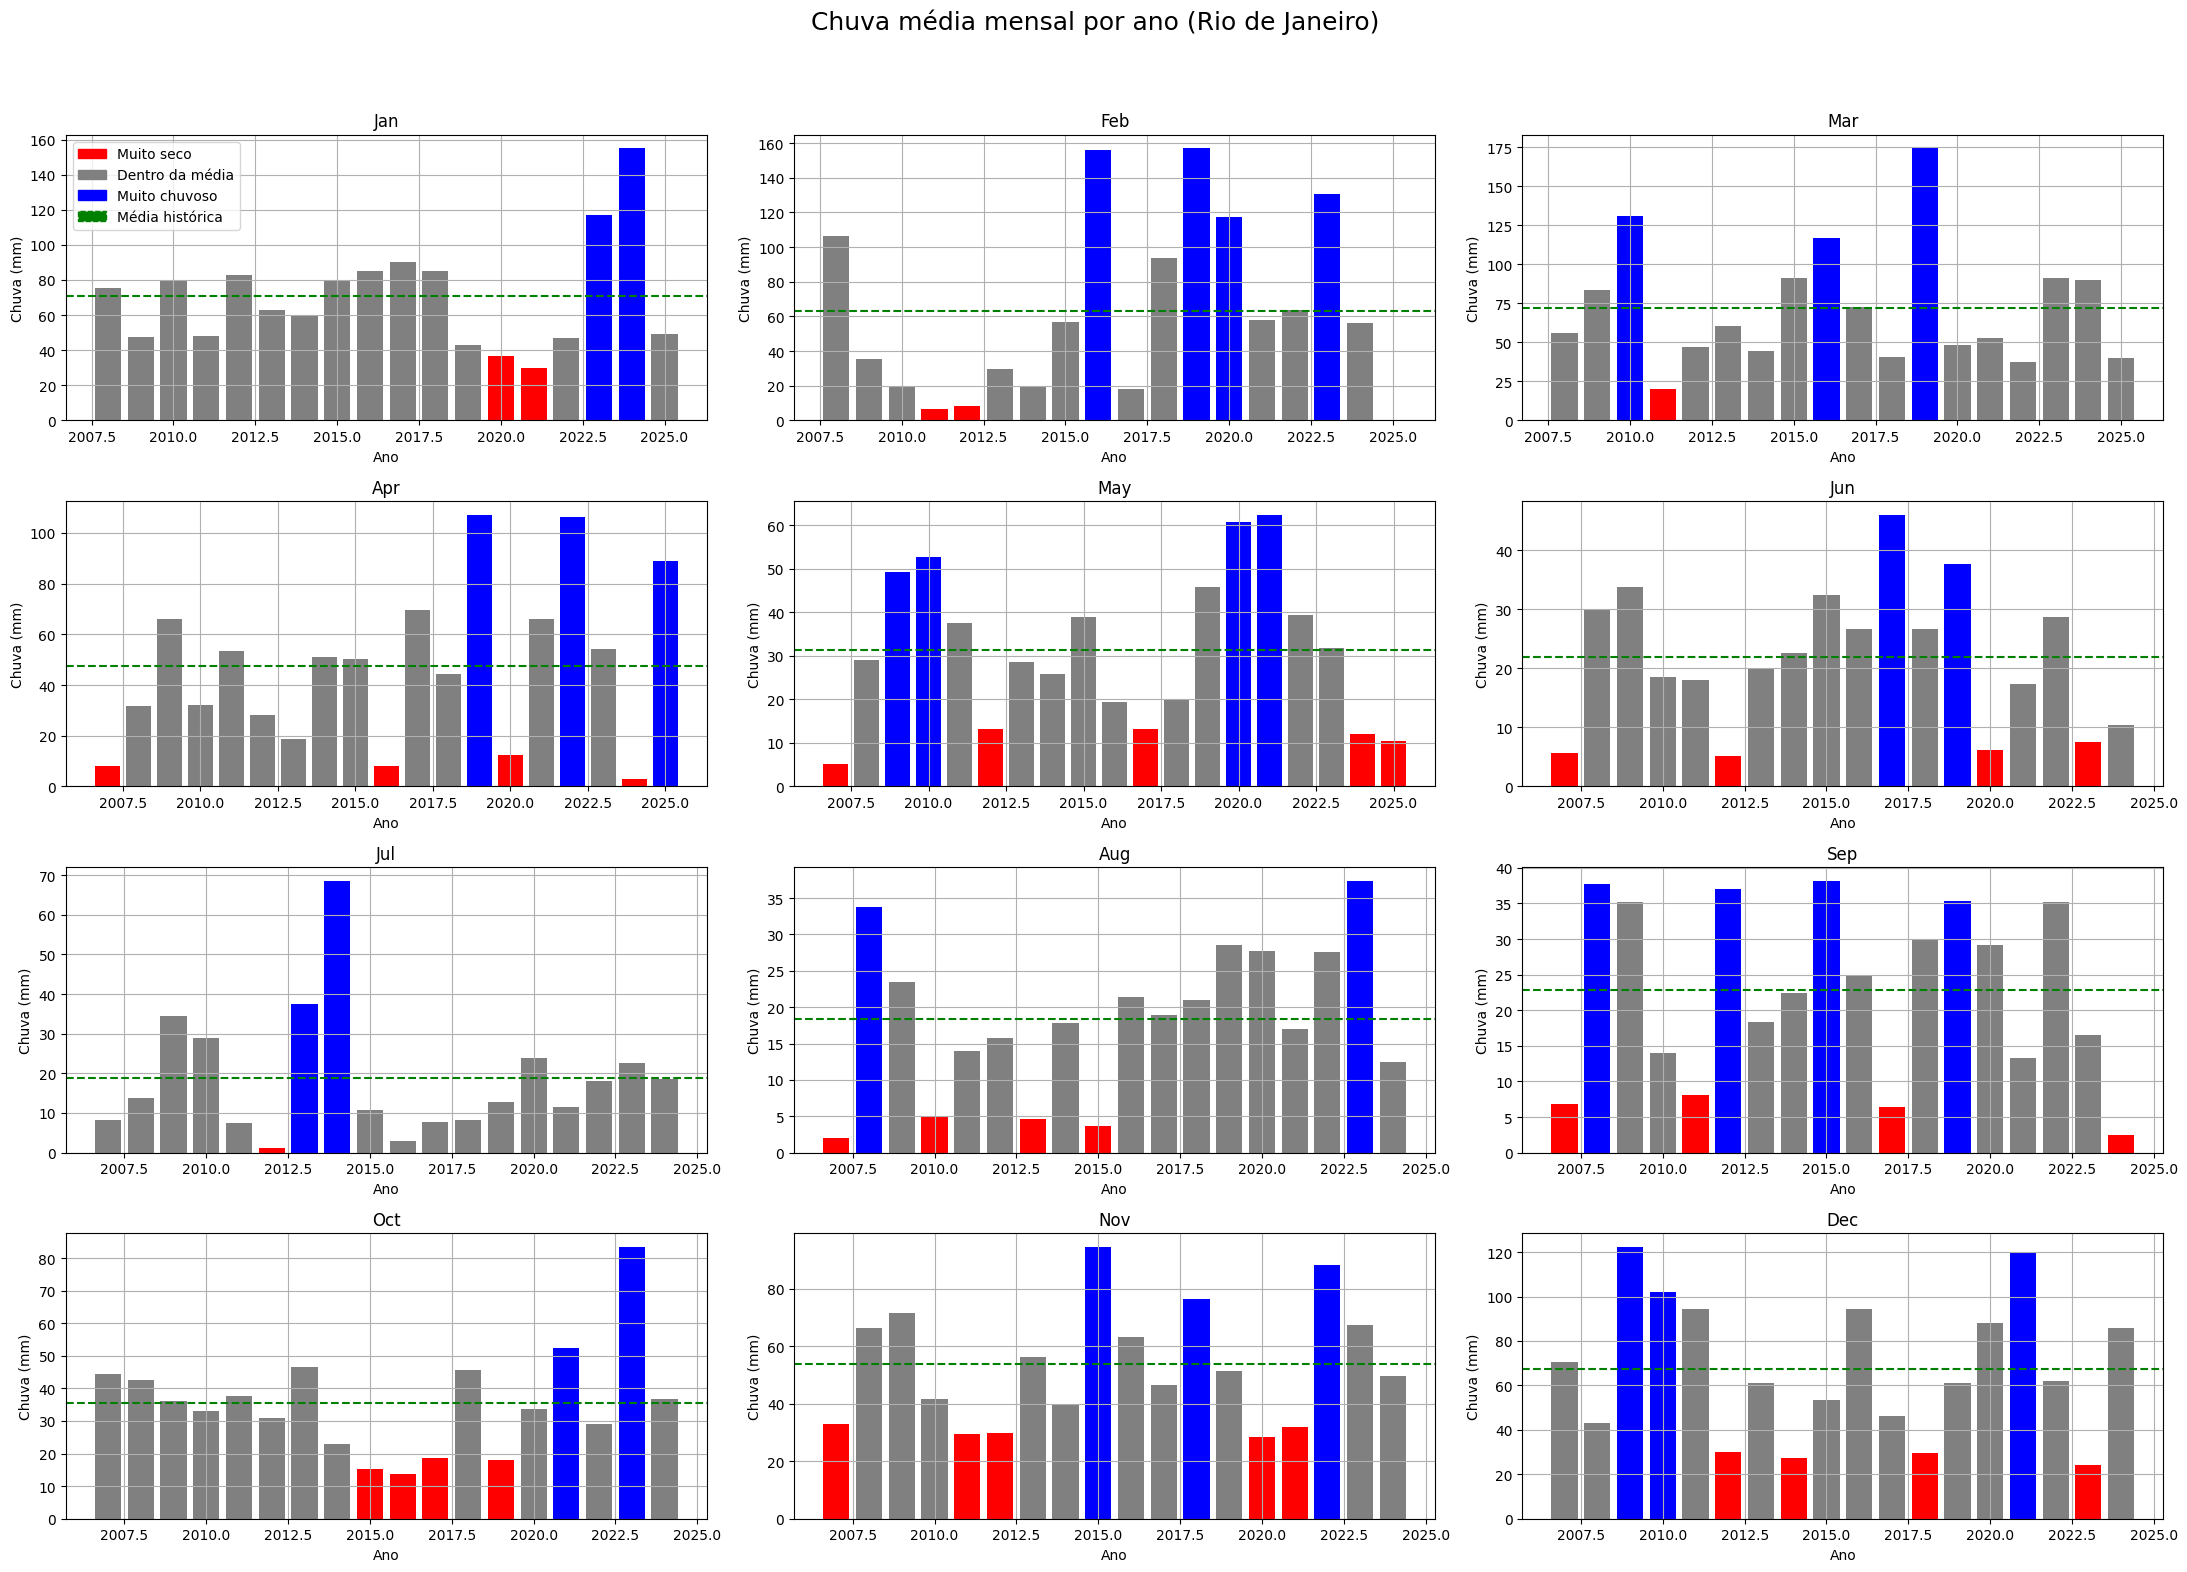

In [391]:
import numpy as np
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

# Lista dos nomes dos meses (de Jan a Dez)
nomes_meses = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

fig, axs = plt.subplots(4, 3, figsize=(22, 16))
axs = axs.ravel()

for mes in range(1, 13):
    dados_mes = chuva_mensal_media[chuva_mensal_media['mes'] == mes]
    chuva_por_ano = dados_mes.groupby('ano')['rain_max'].mean()

    media = chuva_por_ano.mean()
    desvio = chuva_por_ano.std()

    cores = []
    for valor in chuva_por_ano:
        if valor > media + desvio:
            cores.append('blue')
        elif valor < media - desvio:
            cores.append('red')
        else:
            cores.append('gray')

    axs[mes-1].bar(chuva_por_ano.index, chuva_por_ano.values, color=cores)
    axs[mes-1].axhline(media, color='green', linestyle='--', label='Média histórica')
    axs[mes-1].set_title(f'{nomes_meses[mes-1]}')  # <- aqui o ajuste
    axs[mes-1].set_ylabel('Chuva (mm)')
    axs[mes-1].set_xlabel('Ano')
    axs[mes-1].grid(True)

    if mes == 1:  # apenas no primeiro subplot
        legenda = [
            mpatches.Patch(color='red', label='Muito seco'),
            mpatches.Patch(color='gray', label='Dentro da média'),
            mpatches.Patch(color='blue', label='Muito chuvoso'),
            mpatches.Patch(color='green', label='Média histórica', linestyle='--')
        ]
        axs[mes-1].legend(handles=legenda)

plt.suptitle('Chuva média mensal por ano (Rio de Janeiro)', fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


O Gráfico demostra a sazonalidade das precipitações,apresentando uma forte indicação de que o período chuvoso vai de Novembro a Abril.

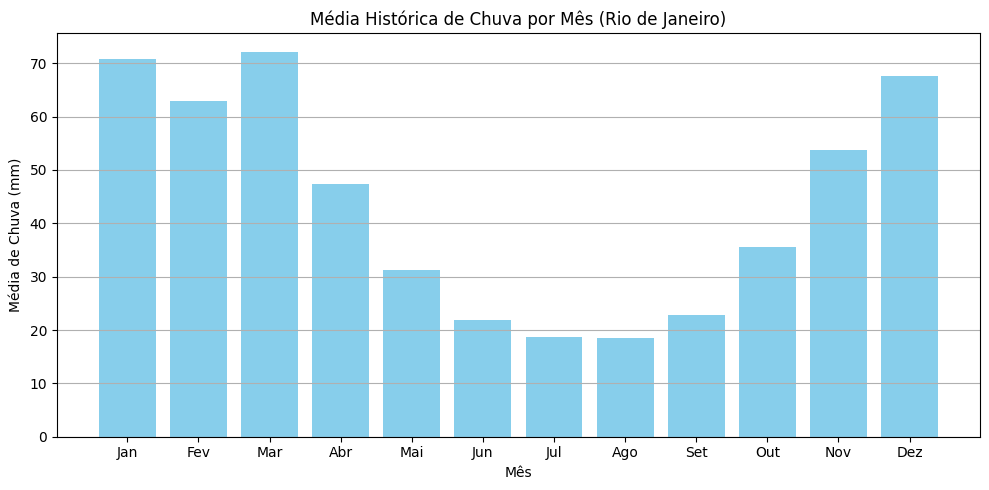

In [392]:
# Lista com nomes dos meses
nomes_meses = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun',
               'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']

# Gráfico de colunas
plt.figure(figsize=(10, 5))
plt.bar(media_historica_mensal['mes'], media_historica_mensal['rain_max'], color='skyblue')

plt.title("Média Histórica de Chuva por Mês (Rio de Janeiro)")
plt.xlabel("Mês")
plt.ylabel("Média de Chuva (mm)")
plt.xticks(ticks=range(1, 13), labels=nomes_meses)  # Substitui número do mês por nome
plt.grid(axis='y')
plt.tight_layout()
plt.show()


## Total e Tipo das Instâncias

O dataset consolidado utilizado nesta análise contém 3.047.579 instâncias (linhas), cada uma representando uma leitura diária realizada por uma estação meteorológica automática em uma determinada data. Essas instâncias cobrem diversas regiões do Brasil, compondo uma base robusta para análise climática.

Neste estudo, foi realizado um recorte para observar apenas as medições de três estações localizadas na Cidade do Rio de Janeiro (A621 – Vila Militar, A652 – Copacabana, e A636 – Jacarepaguá), resultando em 15.902 instâncias específicas para essa região.

Cada instância possui os seguintes atributos essenciais para a análise de precipitação:

ESTACAO (object) – Identificador da estação meteorológica.

DATA (datetime) – Data da medição, no formato YYYY-MM-DD.

rain_max (float) – Quantidade de precipitação acumulada no dia (em milímetros).

Este recorte permite uma análise focada, mantendo a granularidade diária das medições e garantindo comparações consistentes ao longo da série histórica.

A análise foca em rain_max, o que está sendo removido os registros onde esse campo está nulo, preservando os demais.

In [393]:
# Mostrar total de registros no DataFrame geral
print(f"Total de registros meteorológicos no Brasil: {len(df)}")

# Filtrar apenas os registros com rain_max não nulo no df_rio
df_rio_validos = df_rio.dropna(subset=['rain_max']).copy()

# Renomear coluna DATA (YYYY-MM-DD) para DATA
df_rio_validos.rename(columns={'DATA (YYYY-MM-DD)': 'DATA'}, inplace=True)

# Converter a coluna DATA para datetime, caso ainda não esteja
df_rio_validos['DATA'] = pd.to_datetime(df_rio_validos['DATA'])

# Criar colunas ano e mes
df_rio_validos['ano'] = df_rio_validos['DATA'].dt.year
df_rio_validos['mes'] = df_rio_validos['DATA'].dt.month

# Mostrar total de registros válidos no Rio de Janeiro
print(f"Total de registros nas estações do Rio de Janeiro com valor de chuva registrado: {len(df_rio_validos)}")

# Visualizar as primeiras linhas
print(df_rio_validos.head())


Total de registros meteorológicos no Brasil: 3047579
Total de registros nas estações do Rio de Janeiro com valor de chuva registrado: 15728
       ESTACAO       DATA  rain_max  rad_max  temp_avg  temp_max  temp_min  \
135913    A621 2007-04-13       0.0   1668.5       NaN      31.0      25.0   
135914    A621 2007-04-14       2.4   2052.8       NaN      30.5      21.4   
135915    A621 2007-04-15       0.0   2309.8       NaN      31.6      19.9   
135916    A621 2007-04-16       0.0   2113.8       NaN      30.6      21.4   
135917    A621 2007-04-17       4.0   2378.1     25.74      28.7      21.9   

        hum_max  hum_min  wind_max  wind_avg   ano  mes  
135913     88.0     52.0       8.4  1.775000  2007    4  
135914     96.0     53.0       6.9  1.150000  2007    4  
135915     98.0     46.0       7.0  1.200000  2007    4  
135916     96.0     55.0       6.9  1.020833  2007    4  
135917     95.0     58.0       7.5  1.320833  2007    4  


In [394]:
df_rio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15728 entries, 135913 to 3030508
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ESTACAO            15728 non-null  object 
 1   DATA (YYYY-MM-DD)  15728 non-null  object 
 2   rain_max           15728 non-null  float64
 3   rad_max            15579 non-null  float64
 4   temp_avg           15722 non-null  float64
 5   temp_max           15721 non-null  float64
 6   temp_min           15720 non-null  float64
 7   hum_max            15311 non-null  float64
 8   hum_min            15305 non-null  float64
 9   wind_max           15706 non-null  float64
 10  wind_avg           15711 non-null  float64
dtypes: float64(9), object(2)
memory usage: 1.4+ MB


## Estatísticas Descritivas

Estatísticas descritivas fornecem um resumo das características numéricas, incluindo média, desvio padrão, mínimo, máximo e quartis.

In [395]:
# estatísticas descritivas básicas do dataset
df_rio_validos.describe()

,DATA,rain_max,rad_max,temp_avg,temp_max,temp_min,hum_max,hum_min,wind_max,wind_avg,ano,mes
count,15728,15728.000000,15579.000000,15722.000000,15721.000000,15720.00000,15311.000000,15305.000000,15706.000000,15711.000000,15728.000000,15728.000000
mean,2017-03-24 19:30:38.453713152,1.483240,2603.395841,23.719431,28.811526,20.11479,91.060218,53.144267,8.856303,1.759120,2016.728001,6.535669
min,2007-04-13 00:00:00,0.000000,0.000000,14.091667,17.000000,8.10000,9.000000,11.000000,1.500000,0.000000,2007.000000,1.000000
25%,2012-11-07 18:00:00,0.000000,2077.150000,21.570833,25.700000,18.20000,88.000000,41.000000,6.500000,0.945833,2012.000000,4.000000
50%,2018-01-13 00:00:00,0.000000,2711.800000,23.591667,28.600000,20.50000,91.000000,54.000000,8.000000,1.487500,2018.000000,7.000000
75%,2021-08-26 00:00:00,0.600000,3381.700000,25.819792,31.700000,22.30000,95.000000,65.000000,10.400000,2.220833,2021.000000,10.000000
max,2025-05-31 00:00:00,80.200000,5308.300000,36.109091,42.500000,32.70000,100.000000,100.000000,43.100000,12.100000,2025.000000,12.000000
std,NaN,4.551278,974.314142,2.943416,4.113164,3.07577,5.973873,15.609656,3.448196,1.151424,5.195317,3.460888


### Média

A média é uma medida de tendência central que representa o valor típico ou o ponto de equilíbrio de um conjunto de dados. É calculada somando-se todos os valores e dividindo-se pelo número total de observações. É sensível a valores extremos (outliers).

In [396]:
# média dos atributos numéricos do dataset
df_rio_validos.describe().loc['mean']

,mean
DATA,2017-03-24 19:30:38.453713152
rain_max,1.48324
rad_max,2603.395841
temp_avg,23.719431
temp_max,28.811526
temp_min,20.11479
hum_max,91.060218
hum_min,53.144267
wind_max,8.856303
wind_avg,1.75912


### Desvio Padrão

O desvio padrão é uma medida de dispersão que quantifica a quantidade de variação ou dispersão de um conjunto de valores. Um desvio padrão baixo indica que os pontos de dados tendem a estar próximos da média do conjunto, enquanto um desvio padrão alto indica que os pontos de dados estão espalhados por uma faixa maior de valores. Ele é a raiz quadrada da variância.

In [397]:
# desvio padrão dos atributos numéricos do dataset
df_rio_validos.describe().loc['std']

,std
DATA,NaN
rain_max,4.551278
rad_max,974.314142
temp_avg,2.943416
temp_max,4.113164
temp_min,3.07577
hum_max,5.973873
hum_min,15.609656
wind_max,3.448196
wind_avg,1.151424


In [398]:
df_rio_validos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15728 entries, 135913 to 3030508
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   ESTACAO   15728 non-null  object        
 1   DATA      15728 non-null  datetime64[ns]
 2   rain_max  15728 non-null  float64       
 3   rad_max   15579 non-null  float64       
 4   temp_avg  15722 non-null  float64       
 5   temp_max  15721 non-null  float64       
 6   temp_min  15720 non-null  float64       
 7   hum_max   15311 non-null  float64       
 8   hum_min   15305 non-null  float64       
 9   wind_max  15706 non-null  float64       
 10  wind_avg  15711 non-null  float64       
 11  ano       15728 non-null  int32         
 12  mes       15728 non-null  int32         
dtypes: datetime64[ns](1), float64(9), int32(2), object(1)
memory usage: 1.6+ MB


## Histograma

A distribuição de dados descreve como os valores de uma variável se espalham, ou seja, a frequência com que diferentes valores ocorrem. Entender a distribuição é crucial na análise de dados, pois revela padrões, tendências centrais, dispersão e a presença de valores atípicos (outliers). O histograma é uma ferramenta visual fundamental para representar essa distribuição, mostrando a forma dos dados, se são simétricos ou assimétricos, unimodais ou multimodais.

### *Distribuição da Precipitação Diária (rain_max)*

A cidade do Rio de Janeiro passa a maior parte dos dias com pouca ou nenhuma chuva.

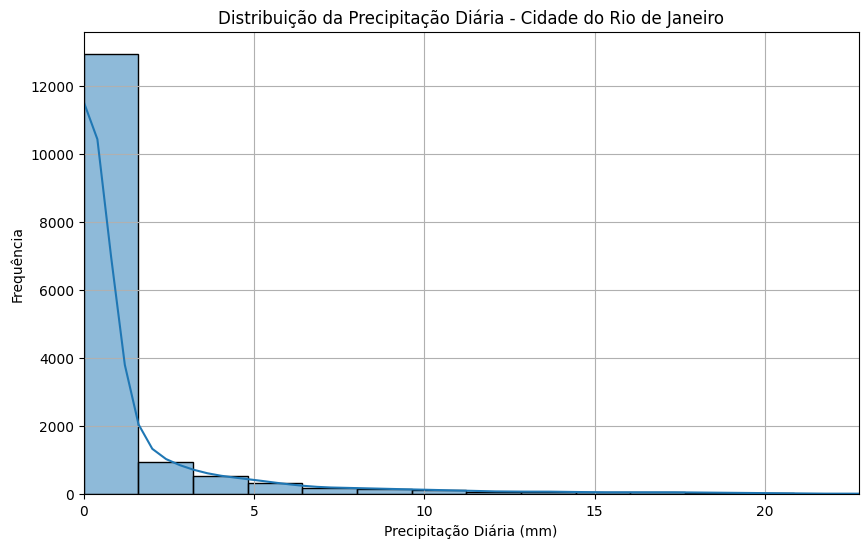

In [399]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df_rio_validos['rain_max'], kde=True, bins=50)
plt.title('Distribuição da Precipitação Diária - Cidade do Rio de Janeiro')
plt.xlabel('Precipitação Diária (mm)')
plt.ylabel('Frequência')
plt.xlim(0, df_rio_validos['rain_max'].quantile(0.99))  # Limita para remover outliers extremos
plt.grid(True)
plt.show()


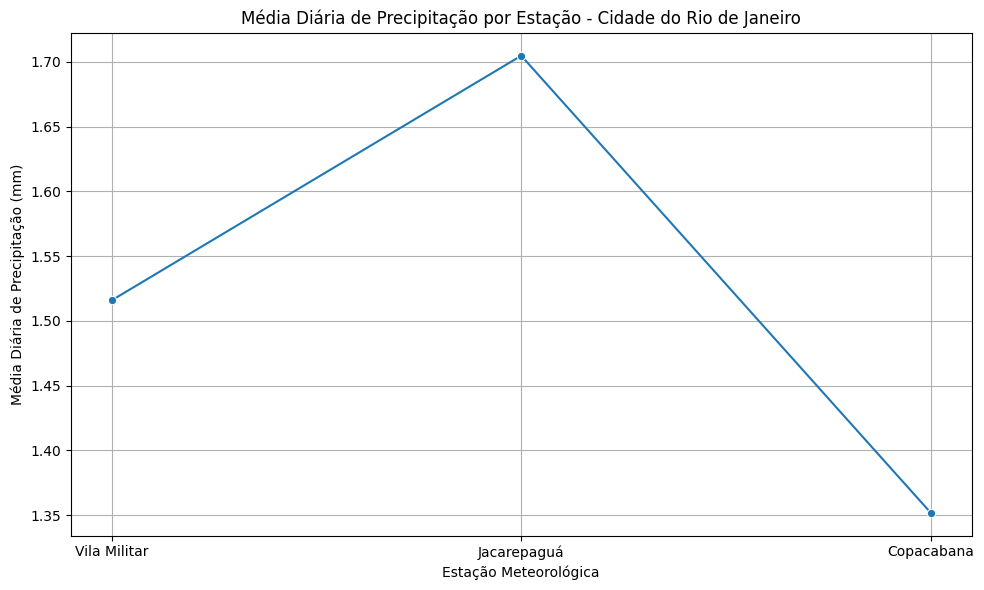

In [400]:
import matplotlib.pyplot as plt
import seaborn as sns

# Dicionário para mapear código para nome completo da estação
nomes_estacoes = {
    'A621': 'Vila Militar',
    'A652': 'Copacabana',
    'A636': 'Jacarepaguá'
}

# Calcular a média diária por estação
media_diaria_por_estacao = df_rio_validos.groupby('ESTACAO')['rain_max'].mean().reset_index()

# Substituir os códigos pelos nomes completos
media_diaria_por_estacao['ESTACAO'] = media_diaria_por_estacao['ESTACAO'].map(nomes_estacoes)

# Gráfico de linha
plt.figure(figsize=(10, 6))
sns.lineplot(data=media_diaria_por_estacao, x='ESTACAO', y='rain_max', marker='o')
plt.title('Média Diária de Precipitação por Estação - Cidade do Rio de Janeiro')
plt.xlabel('Estação Meteorológica')
plt.ylabel('Média Diária de Precipitação (mm)')
plt.grid(True)
plt.tight_layout()
plt.show()


O boxplot do comprimento da pétala por espécie demonstra claramente que a Iris setosa tem pétalas significativamente mais curtas do que as outras duas espécies. Há uma sobreposição entre Iris versicolor e Iris virginica, mas as medianas e as caixas indicam uma distinção.

### *Distribuição* por Mês

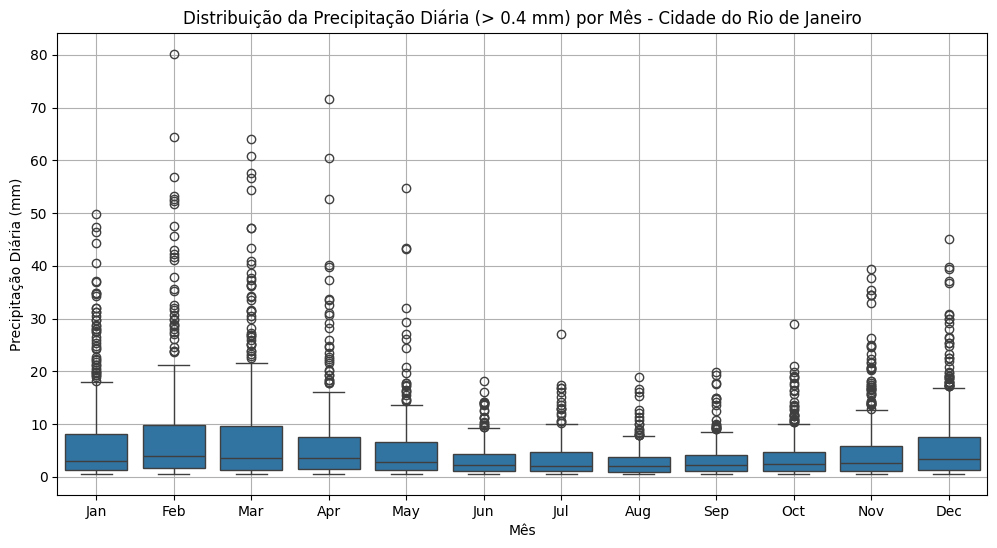

In [401]:
# Garantir a ordem correta dos meses (abreviaturas)
ordem_meses = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

# Filtrar valores de chuva > 0.4 mm
df_rio_filtrado = df_rio_validos[df_rio_validos['rain_max'] > 0.4].copy()

# Criar coluna com nome abreviado do mês
df_rio_filtrado['mes'] = df_rio_filtrado['DATA'].dt.strftime('%b')

# Plotar boxplot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.boxplot(data=df_rio_filtrado, x='mes', y='rain_max', order=ordem_meses)
plt.title('Distribuição da Precipitação Diária (> 0.4 mm) por Mês - Cidade do Rio de Janeiro')
plt.xlabel('Mês')
plt.ylabel('Precipitação Diária (mm)')
plt.grid(True)
plt.show()


## Matriz de Correlação

A matriz de correlação permite verificar relações lineares entre variáveis numéricas do dataset meteorológico.
Ela é especialmente útil para:

Detectar variáveis altamente correlacionadas, como por exemplo temp_max e temp_avg;

Investigar possíveis redundâncias ou relações inesperadas;

Observar a influência da temperatura, umidade e vento sobre a chuva (rain_max).

Os valores da correlação variam de:

+1 → correlação linear positiva perfeita;

0 → nenhuma correlação linear;

-1 → correlação linear negativa perfeita.

Destaques:
rain_max apresenta baixa correlação com todas as variáveis (< 0.2), indicando que a chuva diária não tem forte relação linear com temperatura, umidade, radiação ou vento nas estações analisadas.

As temperaturas (temp_avg, temp_max, temp_min) estão fortemente correlacionadas entre si (correlação > 0.8), o que é esperado, pois variam em conjunto ao longo do dia.

A umidade mínima (hum_min) apresenta correlação negativa moderada com temperatura máxima (-0.66), indicando que dias mais quentes tendem a ter menor umidade mínima.

As variáveis wind_max e wind_avg têm correlação positiva forte entre si (0.68), como esperado.


 Matriz de Correlação:
          rain_max   rad_max  temp_avg  temp_max  temp_min   hum_max  \
rain_max  1.000000 -0.155806  0.019007 -0.054658  0.094750  0.127207   
rad_max  -0.155806  1.000000  0.458662  0.549948  0.229411 -0.130393   
temp_avg  0.019007  0.458662  1.000000  0.853335  0.811625 -0.142884   
temp_max -0.054658  0.549948  0.853335  1.000000  0.447447 -0.024267   
temp_min  0.094750  0.229411  0.811625  0.447447  1.000000 -0.233645   
hum_max   0.127207 -0.130393 -0.142884 -0.024267 -0.233645  1.000000   
hum_min   0.181868 -0.372643 -0.313325 -0.660404  0.188576  0.106915   
wind_max  0.182861  0.035228  0.082709  0.015459  0.144145 -0.115830   
wind_avg  0.031846 -0.010533 -0.046197 -0.219632  0.179514 -0.257461   

           hum_min  wind_max  wind_avg  
rain_max  0.181868  0.182861  0.031846  
rad_max  -0.372643  0.035228 -0.010533  
temp_avg -0.313325  0.082709 -0.046197  
temp_max -0.660404  0.015459 -0.219632  
temp_min  0.188576  0.144145  0.179514  
hum_max  

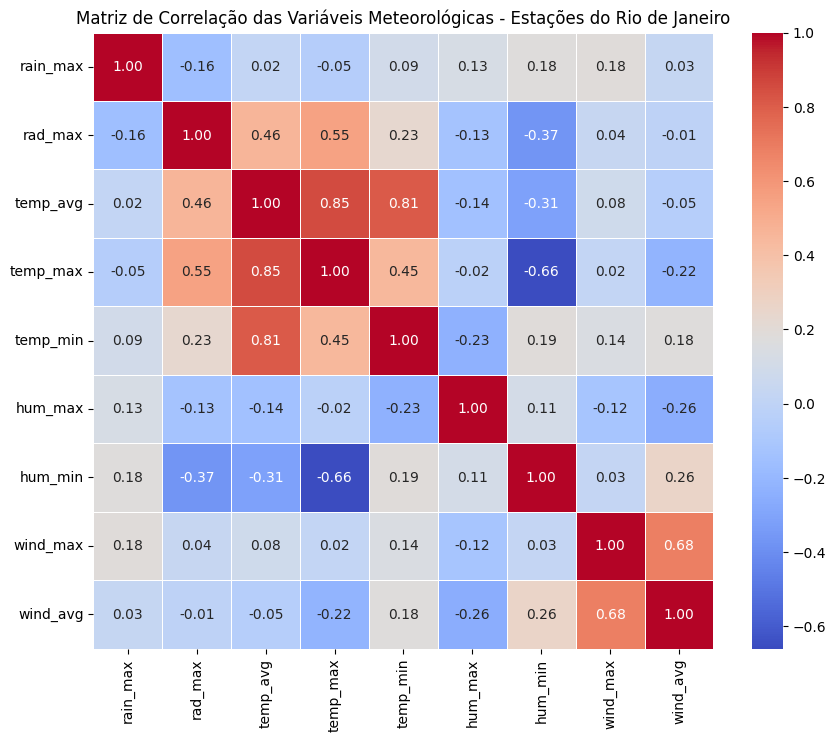

In [402]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selecionar apenas as colunas numéricas relevantes
variaveis_numericas = ['rain_max', 'rad_max', 'temp_avg', 'temp_max', 'temp_min',
                       'hum_max', 'hum_min', 'wind_max', 'wind_avg']

# Criar a matriz de correlação
correlacao = df_rio_validos[variaveis_numericas].corr()

# Exibir a matriz de correlação
print("\n Matriz de Correlação:")
print(correlacao)

# Visualização com heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlação das Variáveis Meteorológicas - Estações do Rio de Janeiro')
plt.show()


O mapa de calor da matriz de correlação revela que quando há picos de vento fortes, a média do dia também tende a ser mais alta. Isso valida que os dias de ventos intensos são consistentemente ventosos ao longo do dia.

## Tratamento de Valores Nulos

In [403]:
# Verificar a presença de valores nulos no dataset meteorológico
print(" Valores nulos no dataset de precipitação (df_rio):")
print(df_rio_validos.isnull().sum())


 Valores nulos no dataset de precipitação (df_rio):
ESTACAO       0
DATA          0
rain_max      0
rad_max     149
temp_avg      6
temp_max      7
temp_min      8
hum_max     417
hum_min     423
wind_max     22
wind_avg     17
ano           0
mes           0
dtype: int64


In [404]:
# Total de registros antes de remover nulos
total_antes = len(df_rio_validos)

# Total de registros após remover qualquer linha com valor nulo
total_depois = df_rio_validos.dropna().shape[0]

# Quantidade de registros que seriam perdidos
perdidos = total_antes - total_depois

print(f" Total de registros antes: {total_antes}")
print(f" Total de registros após remoção dos nulos: {total_depois}")
print(f" Registros que seriam perdidos: {perdidos} ({perdidos / total_antes:.2%})")


 Total de registros antes: 15728
 Total de registros após remoção dos nulos: 15139
 Registros que seriam perdidos: 589 (3.74%)


# Pré-Processamento de Dados

O pré-processamento de dados é uma etapa crucial para preparar os dados para modelagem, garantindo que estejam no formato correto e otimizados para o desempenho do algoritmo.

In [405]:
# Verificar dados ausentes e tipos
df_rio_validos.info()
df_rio_validos.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 15728 entries, 135913 to 3030508
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   ESTACAO   15728 non-null  object        
 1   DATA      15728 non-null  datetime64[ns]
 2   rain_max  15728 non-null  float64       
 3   rad_max   15579 non-null  float64       
 4   temp_avg  15722 non-null  float64       
 5   temp_max  15721 non-null  float64       
 6   temp_min  15720 non-null  float64       
 7   hum_max   15311 non-null  float64       
 8   hum_min   15305 non-null  float64       
 9   wind_max  15706 non-null  float64       
 10  wind_avg  15711 non-null  float64       
 11  ano       15728 non-null  int32         
 12  mes       15728 non-null  int32         
dtypes: datetime64[ns](1), float64(9), int32(2), object(1)
memory usage: 1.6+ MB


,0
ESTACAO,0
DATA,0
rain_max,0
rad_max,149
temp_avg,6
temp_max,7
temp_min,8
hum_max,417
hum_min,423
wind_max,22


In [406]:
#  Separar features (X) e target (y)
X = df_rio_validos.drop(columns=['rain_max', 'ano', 'mes'])
y = df_rio_validos['rain_max']

# Dividir em treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Normalização

A normalização escala os dados para um intervalo fixo, geralmente entre 0 e 1. É útil quando o algoritmo de machine learning assume que as características estão em uma escala semelhante.



In [407]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# 1. Label Encoding para a coluna ESTACAO
le = LabelEncoder()
df_rio_validos['ESTACAO_ENC'] = le.fit_transform(df_rio_validos['ESTACAO'])

# 2. Selecionar as colunas numéricas para normalizar
colunas_numericas = [
    'rain_max', 'rad_max', 'temp_avg', 'temp_max', 'temp_min',
    'hum_max', 'hum_min', 'wind_max', 'wind_avg', 'ano', 'mes'
]

# 3. Normalizar as colunas numéricas
scaler = MinMaxScaler()
df_norm = pd.DataFrame(scaler.fit_transform(df_rio_validos[colunas_numericas]), columns=colunas_numericas)

# 4. Adicionar a coluna categórica já codificada
df_norm['ESTACAO_ENC'] = df_rio_validos['ESTACAO_ENC'].values

# 6. Visualizar
print(df_norm.head())


   rain_max   rad_max  temp_avg  temp_max  temp_min   hum_max   hum_min  \
0  0.000000  0.314319       NaN  0.549020  0.686992  0.868132  0.460674   
1  0.029925  0.386715       NaN  0.529412  0.540650  0.956044  0.471910   
2  0.000000  0.435130       NaN  0.572549  0.479675  0.978022  0.393258   
3  0.000000  0.398207       NaN  0.533333  0.540650  0.956044  0.494382   
4  0.049875  0.447997  0.529051  0.458824  0.560976  0.945055  0.528090   

   wind_max  wind_avg  ano       mes  ESTACAO_ENC  
0  0.165865  0.146694  0.0  0.272727            0  
1  0.129808  0.095041  0.0  0.272727            0  
2  0.132212  0.099174  0.0  0.272727            0  
3  0.129808  0.084366  0.0  0.272727            0  
4  0.144231  0.109160  0.0  0.272727            0  


## Padronização

A padronização (ou Z-score scaling) transforma os dados para ter média 0 e desvio padrão 1. É útil para algoritmos que são sensíveis à escala das características, como SVMs ou redes neurais.

In [408]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

# 1. Label Encoding para a coluna ESTACAO
le = LabelEncoder()
df_rio_validos['ESTACAO_ENC'] = le.fit_transform(df_rio_validos['ESTACAO'])

# 2. Selecionar as colunas numéricas para normalizar
colunas_numericas = [
    'rain_max', 'rad_max', 'temp_avg', 'temp_max', 'temp_min',
    'hum_max', 'hum_min', 'wind_max', 'wind_avg', 'ano', 'mes'
]

# 3. Normalizar as colunas numéricas
scaler_norm = MinMaxScaler()
df_norm = pd.DataFrame(scaler_norm.fit_transform(df_rio_validos[colunas_numericas]), columns=colunas_numericas)

# 4. Adicionar a coluna categórica já codificada
df_norm['ESTACAO_ENC'] = df_rio_validos['ESTACAO_ENC'].values

# 5. PADRONIZAÇÃO: StandardScaler nas mesmas colunas numéricas
scaler_std = StandardScaler()
df_std = pd.DataFrame(scaler_std.fit_transform(df_rio_validos[colunas_numericas]), columns=colunas_numericas)

# 6. Adicionar a coluna categórica também no DataFrame padronizado
df_std['ESTACAO_ENC'] = df_rio_validos['ESTACAO_ENC'].values

# 7. Visualizar
print("DataFrame Normalizado:")
print(df_norm.head())
print("\nDataFrame Padronizado:")
print(df_std.head())


DataFrame Normalizado:
   rain_max   rad_max  temp_avg  temp_max  temp_min   hum_max   hum_min  \
0  0.000000  0.314319       NaN  0.549020  0.686992  0.868132  0.460674   
1  0.029925  0.386715       NaN  0.529412  0.540650  0.956044  0.471910   
2  0.000000  0.435130       NaN  0.572549  0.479675  0.978022  0.393258   
3  0.000000  0.398207       NaN  0.533333  0.540650  0.956044  0.494382   
4  0.049875  0.447997  0.529051  0.458824  0.560976  0.945055  0.528090   

   wind_max  wind_avg  ano       mes  ESTACAO_ENC  
0  0.165865  0.146694  0.0  0.272727            0  
1  0.129808  0.095041  0.0  0.272727            0  
2  0.132212  0.099174  0.0  0.272727            0  
3  0.129808  0.084366  0.0  0.272727            0  
4  0.144231  0.109160  0.0  0.272727            0  

DataFrame Padronizado:
   rain_max   rad_max  temp_avg  temp_max  temp_min   hum_max   hum_min  \
0 -0.325906 -0.959573       NaN  0.532083  1.588339 -0.512284 -0.073307   
1  0.201436 -0.565129       NaN  0.41051

# Conclusão

A análise e o pré-processamento do dataset meteorológico histórico da Cidade do Rio de Janeiro destacam a importância de organizar, explorar e compreender as variáveis antes da aplicação de qualquer técnica de modelagem ou previsão. O conjunto de dados original passou por etapas de filtragem, limpeza de nulos e seleção de variáveis relevantes, com foco na coluna rain_max (precipitação diária máxima registrada).

Durante a análise exploratória, utilizamos ferramentas como boxplots e histogramas para observar a distribuição da precipitação por estação meteorológica e por mês, além de calcular estatísticas descritivas. A normalização e padronização de dados, mesmo com foco em apenas uma variável (rain_max), permitiram observar melhor a dispersão e padronizar a escala para futuras análises mais robustas.

Três hipóteses principais foram levantadas ao longo do trabalho e foram validadas com os dados históricos:

A precipitação apresenta variações mensais significativas ao longo do ano?
Sim.
A média e o acumulado mensal mostraram que há meses consideravelmente mais chuvosos que outros, com destaque para os meses de verão.

Estações diferentes dentro da cidade registram padrões distintos de precipitação?
Sim.
Os boxplots por estação mostraram que existe variação nas distribuições das leituras, o que pode estar relacionado à localização geográfica das estações e microclimas locais.

Filtrar dias com chuvas muito leves (abaixo de 0.4 mm) influencia nas médias mensais?
Sim.
Ao excluir registros de precipitação mínima, as médias mensais se tornaram mais realistas para estudos de impacto, concentrando-se em dias com precipitação efetiva.